# wbFinder

This tutorial shows how to detect water molecules that might form 
hydrogen bonds with protein structures (called water bridges).
The prediction method introduced here helps evaluate the significance 
of water molecules on the stability of protein structure. 

First import everything from the ProDy packages:

In [1]:
from prody import *

## Protein preparation

Because in PDB structures we will have water molecules without 
hydrogens we would have to add them. We can use :func:`.addMissingAtoms` 
function. This function use either *Openbabel* or *PDBFixer* and both 
packages required PDB file saved in the local directory. Those are 
external packages therefore they should be installed 
independently. How to install them can be found in :class:`.Interactions`.
We can also directly provide PDB structure with hydrogens added by other 
software.

Here we will fetch PDB structure with LMW-PTP **5kqm** from 
Protein Data Bank (PDB) in incompressed form using *compressed=False* 
and add missing atoms using :func:`.addMissingAtoms`:

In [2]:
PDB = '5kqm'
fetchPDB(PDB, compressed=False)

@> PDB file is found in working directory (5kqm.pdb).


'5kqm.pdb'

In [3]:
addMissingAtoms(PDB+'.pdb')

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is 5kqm.pdb)

@> Hydrogens were added to the structure. Structure addH_5kqm.pdb is saved in the local directry.


'addH_5kqm.pdb'

A new file with hydrogens is now created. It will contain *'addH_'* as 
a prefix. For protein structures that don't contain hydrogens, 
results will also be computed without applying angle criteria.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in a single PDB structure*

To analyze the structure we need to parse a structure **addH_5kqm.pdb**
using :func:`.parsePDB`:

In [4]:
PDBfile = 'addH_'+PDB+'.pdb'
coords = parsePDB(PDBfile)

@> 2815 atoms and 1 coordinate set(s) were parsed in 0.03s.


Before analysis, we can check how many water molecules are present
in our PDB structure and later compare how many of them were meaningful
for protein structure:

In [5]:
water_molecules = coords.select('water')
len(water_molecules)

363

Next, we can use :func:`.calcWaterBridges` and one out of two methods 
to detect water bridges, *'chain'* or *'cluster'*:

1. **Method 'chain' (default)** which will detect water molecules between pairs of hydrophilic residues:

In [6]:
waterBridges_chain = calcWaterBridges(coords)

@> 45 water bridges detected.
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> GLY14 O_72 A GLU50 N_347 A 4.544135231262378 1 ['A_1274']
@> GLY14 O_72 A SER47 O_328 A 5.288116583434976 1 ['A_1274']
@> ARG18 NH2_105 A ASN95 ND2_714 A 4.570361692470302 1 ['A_1261']
@> ARG18 NH2_105 A ASP92 OD1_690 A 5.373355841557489 1 ['A_1261']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE1_139 A GLU23 OE2_140 A 2.206470711339718 1 ['A_1244']
@> GLU23 OE1_139 A SER71 O_514 A 5.272447154784958 1 ['A_1244']
@> GLU23 OE1_139 A HIS72 ND1_523 A 3.2114691342125647 1 ['A_1244']
@> GLU23 OE2_140 A SER71 O_514 A 4.934310286149422 1 ['A_1244']
@> GLU23 OE2_140 A HIS72 ND1_523 A 4.127239392136104 1 ['A_1244']
@> ARG27 NE_171 A ARG27 NH2_174 A 2.298703982682415 1 ['A_1339']
@> ARG27 NE_171 A VAL41 N_287 A 5.672199573357763 1 ['A_1339']
@> ARG27 NH1_173 A SER71 N_511 A 6.128045528551498 1 ['A_1319']
@> ARG27

2. **Method 'cluster'** which will detect water molecules between multiple hydrophilic residues:

In [7]:
waterBridges_cluster = calcWaterBridges(coords, method='cluster')

@> 45 water bridges detected.
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> GLY14 O_72 A SER47 O_328 A GLU50 N_347 A 5.288116583434976 4.544135231262378 5.10489901956934 1 ['A_1274']
@> ARG18 NH2_105 A ASN95 ND2_714 A ASP92 OD1_690 A 4.570361692470302 5.373355841557489 3.3343465626716116 2 ['A_1261', 'A_1300']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> SER71 O_514 A HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.463734423103597 4.934310286149422 5.272447154784958 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> SER71 O_514 A HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.463734423103597 4.934310286149422 5.272447154784958 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> ARG27 NE_171 A ARG27 NH2_174 A VAL41 N_287 A 2.298703982682415 5.672199573357763 4.642634596864156 1 ['A_1339']
@> SER71 N_511 A ARG27 NH1_173 A 6.128045528551498 1 

*'Chain' method* detected **42** water bridges and *'Cluster' method* 
second **49**. The total number of water molecules in the crystal 
structure is **363**. As we can see, many of them are not meaningful 
for the protein stability.

### Save results in PDB file:

We can use :func:`.savePDBWaterBridges` to save the results in PDB
file. File will contain water molecules that are forming
potential hydrogen bridges and protein structure. Residues involved 
in water bridges can be displayed using occupancy column.

In [8]:
savePDBWaterBridges(waterBridges_cluster, coords, PDBfile[:-4]+'_wb_cluster.pdb')
savePDBWaterBridges(waterBridges_chain, coords, PDBfile[:-4]+'_wb_chain.pdb')

'addH_5kqm_wb_chain.pdb'

### Access to the raw data

To have acces to the raw data, we need to include paramater 
additional parameter *ouput='info'* in :func:`.calcWaterBridges`.

In [9]:
waterBridges_cluster = calcWaterBridges(coords, method='cluster', output='info')
waterBridges_cluster

@> 45 water bridges detected.
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> GLY14 O_72 A SER47 O_328 A GLU50 N_347 A 5.288116583434976 4.544135231262378 5.10489901956934 1 ['A_1274']
@> ARG18 NH2_105 A ASN95 ND2_714 A ASP92 OD1_690 A 4.570361692470302 5.373355841557489 3.3343465626716116 2 ['A_1261', 'A_1300']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> SER71 O_514 A HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.463734423103597 4.934310286149422 5.272447154784958 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> SER71 O_514 A HIS72 ND1_523 A GLU23 OE2_140 A GLU23 OE1_139 A 4.463734423103597 4.934310286149422 5.272447154784958 4.127239392136104 3.2114691342125647 2.206470711339718 1 ['A_1244']
@> ARG27 NE_171 A ARG27 NH2_174 A VAL41 N_287 A 2.298703982682415 5.672199573357763 4.642634596864156 1 ['A_1339']
@> SER71 N_511 A ARG27 NH1_173 A 6.128045528551498 1 

[['SER7',
  'OG_21',
  'A',
  'ARG40',
  'NH1_285',
  'A',
  4.900955519079926,
  1,
  ['A_1289']],
 ['SER7',
  'OG_21',
  'A',
  'LYS110',
  'NZ_838',
  'A',
  4.70722699686344,
  1,
  ['A_1316']],
 ['GLY14',
  'O_72',
  'A',
  'SER47',
  'O_328',
  'A',
  'GLU50',
  'N_347',
  'A',
  5.288116583434976,
  4.544135231262378,
  5.10489901956934,
  1,
  ['A_1274']],
 ['ARG18',
  'NH2_105',
  'A',
  'ASN95',
  'ND2_714',
  'A',
  'ASP92',
  'OD1_690',
  'A',
  4.570361692470302,
  5.373355841557489,
  3.3343465626716116,
  2,
  ['A_1261', 'A_1300']],
 ['PRO20',
  'O_115',
  'A',
  'GLU23',
  'OE1_139',
  'A',
  4.571172934816621,
  1,
  ['A_1292']],
 ['SER71',
  'O_514',
  'A',
  'HIS72',
  'ND1_523',
  'A',
  'GLU23',
  'OE2_140',
  'A',
  'GLU23',
  'OE1_139',
  'A',
  4.463734423103597,
  4.934310286149422,
  5.272447154784958,
  4.127239392136104,
  3.2114691342125647,
  2.206470711339718,
  1,
  ['A_1244']],
 ['SER71',
  'O_514',
  'A',
  'HIS72',
  'ND1_523',
  'A',
  'GLU23',
  'OE

In [10]:
waterBridges_chain = calcWaterBridges(coords, output='info')

@> 45 water bridges detected.
@> SER7 OG_21 A ARG40 NH1_285 A 4.900955519079926 1 ['A_1289']
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> GLY14 O_72 A GLU50 N_347 A 4.544135231262378 1 ['A_1274']
@> GLY14 O_72 A SER47 O_328 A 5.288116583434976 1 ['A_1274']
@> ARG18 NH2_105 A ASN95 ND2_714 A 4.570361692470302 1 ['A_1261']
@> ARG18 NH2_105 A ASP92 OD1_690 A 5.373355841557489 1 ['A_1261']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE1_139 A GLU23 OE2_140 A 2.206470711339718 1 ['A_1244']
@> GLU23 OE1_139 A SER71 O_514 A 5.272447154784958 1 ['A_1244']
@> GLU23 OE1_139 A HIS72 ND1_523 A 3.2114691342125647 1 ['A_1244']
@> GLU23 OE2_140 A SER71 O_514 A 4.934310286149422 1 ['A_1244']
@> GLU23 OE2_140 A HIS72 ND1_523 A 4.127239392136104 1 ['A_1244']
@> ARG27 NE_171 A ARG27 NH2_174 A 2.298703982682415 1 ['A_1339']
@> ARG27 NE_171 A VAL41 N_287 A 5.672199573357763 1 ['A_1339']
@> ARG27 NH1_173 A SER71 N_511 A 6.128045528551498 1 ['A_1319']
@> ARG27

We can check which residues are involved in water bridges
using the code below. First we need to extract residues names 
and display them without repetitions.

In [11]:
allresidues = []
for i in waterBridges_chain:
    allresidues.append(i[0])
    allresidues.append(i[3])

import numpy as np
allresidues_once = np.unique(allresidues)    
allresidues_once

array(['ARG147', 'ARG150', 'ARG18', 'ARG27', 'ARG40', 'ARG65', 'ARG75',
       'ASN95', 'ASP135', 'ASP137', 'ASP42', 'ASP81', 'ASP92', 'ASP98',
       'CYS148', 'GLN105', 'GLN144', 'GLN76', 'GLU23', 'GLU37', 'GLU50',
       'GLU93', 'GLY117', 'GLY14', 'HIS72', 'ILE126', 'LEU125', 'LYS102',
       'LYS110', 'LYS79', 'PRO20', 'SER36', 'SER47', 'SER7', 'SER71',
       'SER94', 'THR140', 'THR46', 'THR84', 'TYR131', 'TYR132', 'VAL41'],
      dtype='<U6')

We can also count how many times each residue was involved 
in water bridges (with different waters) and display the 
number of counts as a histogram.

In [12]:
from collections import Counter
aa_counter = Counter(allresidues)
sorted_aa_counter = dict(sorted(aa_counter.items(), key=lambda item: item[1], reverse=True))
sorted_aa_counter

{'GLU23': 7,
 'ARG27': 5,
 'ARG40': 4,
 'SER71': 4,
 'SER36': 4,
 'ASP81': 4,
 'ILE126': 4,
 'GLU50': 3,
 'HIS72': 3,
 'GLU93': 3,
 'LEU125': 3,
 'SER7': 2,
 'GLY14': 2,
 'SER47': 2,
 'ARG18': 2,
 'ASN95': 2,
 'ASP92': 2,
 'VAL41': 2,
 'GLU37': 2,
 'THR84': 2,
 'TYR131': 2,
 'LYS79': 2,
 'GLN105': 2,
 'LYS102': 2,
 'ARG147': 2,
 'ARG150': 2,
 'LYS110': 1,
 'PRO20': 1,
 'ASP42': 1,
 'THR46': 1,
 'ASP98': 1,
 'ARG65': 1,
 'ASP135': 1,
 'ARG75': 1,
 'GLN76': 1,
 'SER94': 1,
 'GLY117': 1,
 'TYR132': 1,
 'ASP137': 1,
 'THR140': 1,
 'GLN144': 1,
 'CYS148': 1}

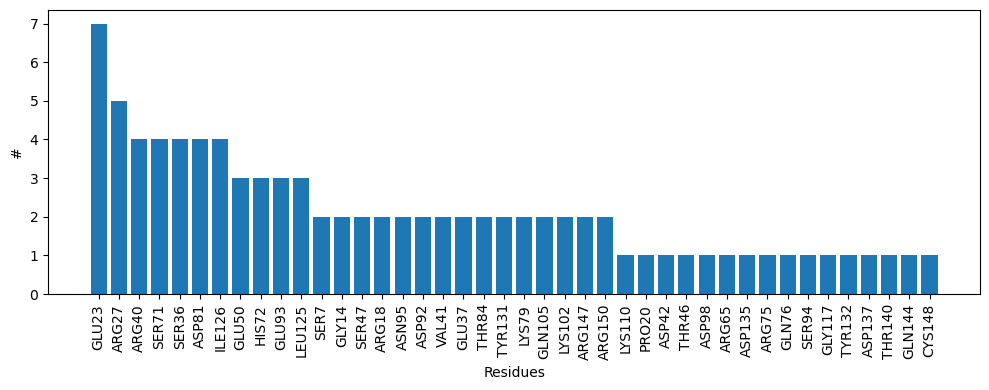

In [13]:
import matplotlib.pyplot as plt

values = list(sorted_aa_counter.values())
labels = list(sorted_aa_counter.keys())

plt.figure(figsize=(10, 4))
plt.bar(labels, values)
plt.xticks(rotation=90)
plt.xlabel('Residues')
plt.ylabel('#')
plt.tight_layout()
plt.show()

Based on the results we can see that there is one 
residue, GLU23, which participate often in the interactions
with water molecules.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in a trajectory*

Now, we will perform calculations for a trajectory file.
We will use :func:`.calcWaterBridgesTrajectory` for which 
we need to provide PDB and DCD file.


We will use files that were prepared in NAMD. The system
(protein in a water box) can be found in *5kqm_all_sci.pdb*. 
Trajectory, *NAMD_D2_sample.dcd*, has dcd format.

In [14]:
PDBtraj_file = "5kqm_all_sci.pdb"
coords_traj = parsePDB(PDBtraj_file)
trajectory = parseDCD("NAMD_D2_sample.dcd")

@> 19321 atoms and 1 coordinate set(s) were parsed in 0.18s.
@> DCD file contains 17 coordinate sets for 19321 atoms.
@> DCD file was parsed in 0.01 seconds.
@> 3.76 MB parsed at input rate 748.06 MB/s.
@> 17 coordinate sets parsed at input rate 3382 frame/s.


The analysis od water bridges can be performed on selected frames by using 
*start_frame* or *stop_frame*. 

In [15]:
wb_traj = calcWaterBridgesTrajectory(coords_traj, trajectory, start_frame=5, stop_frame=15, output='info')

@> Frame: 5
@> 101 water bridges detected.
@> Frame: 6
@> 107 water bridges detected.
@> Frame: 7
@> 90 water bridges detected.
@> Frame: 8
@> 97 water bridges detected.
@> Frame: 9
@> 122 water bridges detected.
@> Frame: 10
@> 101 water bridges detected.
@> Frame: 11
@> 130 water bridges detected.
@> Frame: 12
@> 132 water bridges detected.
@> Frame: 13
@> 126 water bridges detected.
@> Frame: 14
@> 88 water bridges detected.
@> Frame: 15
@> 105 water bridges detected.


Because of the number of data there results will not be displayed.
We can have an access to the raw data by using *output='info'*.

In [16]:
wb_traj

[[['THR5',
   'OG1_8',
   'P',
   'TRP39',
   'NE1_547',
   'P',
   3.261452627054999,
   1,
   ['3W_13313']],
  ['THR5',
   'O_15',
   'P',
   'ASP86',
   'OD1_1269',
   'P',
   5.986350034086454,
   2,
   ['3W_12974', '3W_18431']],
  ['THR5',
   'O_15',
   'P',
   'LYS110',
   'NZ_1667',
   'P',
   7.375256709599827,
   2,
   ['3W_12974', '3W_18431']],
  ['THR5',
   'O_15',
   'P',
   'LYS6',
   'NZ_32',
   'P',
   6.414308925017051,
   2,
   ['3W_12974', '3W_12152']],
  ['LYS6',
   'NZ_32',
   'P',
   'TYR87',
   'OH_1286',
   'P',
   4.891713264838611,
   1,
   ['3W_9209']],
  ['LYS6',
   'NZ_32',
   'P',
   'ASP86',
   'O_1272',
   'P',
   6.000079664458025,
   2,
   ['3W_7319', '3W_17114']],
  ['GLY14',
   'O_156',
   'P',
   'GLU50',
   'O_711',
   'P',
   4.4703701847403154,
   1,
   ['3W_14210']],
  ['GLY14',
   'O_156',
   'P',
   'ASN53',
   'ND2_747',
   'P',
   5.847016041542153,
   1,
   ['3W_14210']],
  ['ARG18',
   'NH1_217',
   'P',
   'ASP129',
   'N_1970',
   'P',
  

### Save the results

The results can be saved using :func:`.saveWaterBridges`
in two formats. Txt file will contain all the results for 
analysis and can be visualized in text editor, and wb file
will restore data for further analysis. It can be uploaded using
:func:`.parseWaterBridges` as shown below.

In [17]:
waterBridges_save = calcWaterBridgesTrajectory(coords_traj, trajectory, stop_frame=15)
saveWaterBridges(waterBridges_save,'wb_saved.txt')
saveWaterBridges(waterBridges_save,'wb_saved.wb')

@> Frame: 0
@> 48 water bridges detected.
@> Frame: 1
@> 48 water bridges detected.
@> Frame: 2
@> 94 water bridges detected.
@> Frame: 3
@> 110 water bridges detected.
@> Frame: 4
@> 105 water bridges detected.
@> Frame: 5
@> 101 water bridges detected.
@> Frame: 6
@> 107 water bridges detected.
@> Frame: 7
@> 90 water bridges detected.
@> Frame: 8
@> 97 water bridges detected.
@> Frame: 9
@> 122 water bridges detected.
@> Frame: 10
@> 101 water bridges detected.
@> Frame: 11
@> 130 water bridges detected.
@> Frame: 12
@> 132 water bridges detected.
@> Frame: 13
@> 126 water bridges detected.
@> Frame: 14
@> 88 water bridges detected.
@> Frame: 15
@> 105 water bridges detected.


To upload wb file use :func:`.parseWaterBridges` and protein coordinates
as follows:

In [18]:
uploaded_results = parseWaterBridges('wb_saved.wb',coords_traj)

Uploaded results are of type atomic (.wb file), therefore it can be 
used for analysis later. The atomic output can be transformed to 
detailed information using :func:`.getWaterBridgesInfoOutput`.

### Analysis of the results

To perform analysis we can not use *output='info'*, therefore 
we will run the calculations again. This time we will run first 15
frames of the simulation.

In [19]:
waterBridges = calcWaterBridgesTrajectory(coords_traj, trajectory, stop_frame=15)

@> Frame: 0
@> 48 water bridges detected.
@> Frame: 1
@> 48 water bridges detected.
@> Frame: 2
@> 94 water bridges detected.
@> Frame: 3
@> 110 water bridges detected.
@> Frame: 4
@> 105 water bridges detected.
@> Frame: 5
@> 101 water bridges detected.
@> Frame: 6
@> 107 water bridges detected.
@> Frame: 7
@> 90 water bridges detected.
@> Frame: 8
@> 97 water bridges detected.
@> Frame: 9
@> 122 water bridges detected.
@> Frame: 10
@> 101 water bridges detected.
@> Frame: 11
@> 130 water bridges detected.
@> Frame: 12
@> 132 water bridges detected.
@> Frame: 13
@> 126 water bridges detected.
@> Frame: 14
@> 88 water bridges detected.
@> Frame: 15
@> 105 water bridges detected.


### Information about residues contributiong to water bridges

Analysis of the data can be performed using :func:`.calcWaterBridgesStatistics`.
The analysis presented below gave information about 
pairs of residues involved in water bridges, how often 
they occur, and the average distance between them. 
Standard deviation provides information on how the distance was
changing during the simulation.Additionally, the analysis can be 
saved by using *filename* option.

In [20]:
analysisAtomic = calcWaterBridgesStatistics(waterBridges, trajectory, filename='data.txt')

for item in analysisAtomic.items():
  print(item)

@> RES1           RES2           PERC      DIST_AVG  DIST_STD  
@> SER7P          ARG40P         12.500    4.901     0.000     
@> ARG40P         SER7P          12.500    4.901     0.000     
@> ARG18P         ASP92P         68.750    4.285     1.159     
@> ASP92P         ARG18P         68.750    4.285     1.159     
@> ARG18P         ASN95P         68.750    5.099     1.192     
@> ASN95P         ARG18P         68.750    5.099     1.192     
@> PRO20P         GLU23P         12.500    4.571     0.000     
@> GLU23P         PRO20P         12.500    4.571     0.000     
@> GLU23P         HSE72P         12.500    3.669     0.458     
@> HSE72P         GLU23P         12.500    3.669     0.458     
@> ARG27P         VAL41P         56.250    5.565     0.781     
@> VAL41P         ARG27P         56.250    5.565     0.781     
@> ARG27P         SER71P         75.000    6.116     0.445     
@> SER71P         ARG27P         75.000    6.116     0.445     
@> ASP32P         ASN34P         25.000 

@> ARG97P         ARG101P        18.750    7.288     0.793     
@> ARG101P        ARG97P         18.750    7.288     0.793     
@> ASP98P         LYS102P        25.000    2.643     0.053     
@> LYS102P        ASP98P         25.000    2.643     0.053     
@> ARG101P        GLN105P        37.500    6.467     1.247     
@> GLN105P        ARG101P        37.500    6.467     1.247     
@> ARG101P        LYS102P        56.250    4.974     1.039     
@> LYS102P        ARG101P        56.250    4.974     1.039     
@> LYS107P        THR108P        43.750    4.141     1.303     
@> THR108P        LYS107P        43.750    4.141     1.303     
@> LYS110P        ALA111P        12.500    3.661     0.186     
@> ALA111P        LYS110P        12.500    3.661     0.186     
@> LYS112P        GLU114P        12.500    2.691     0.132     
@> GLU114P        LYS112P        12.500    2.691     0.132     
@> LEU116P        GLY117P        50.000    2.824     0.058     
@> GLY117P        LEU116P        50.000 

@> TYR87P         LYS6P          12.500    5.035     0.143     
@> CYS17P         ASP129P        6.250     5.459     0.000     
@> ASP129P        CYS17P         6.250     5.459     0.000     
@> CYS17P         ARG58P         12.500    5.532     0.887     
@> ARG58P         CYS17P         12.500    5.532     0.887     
@> CYS17P         TYR132P        6.250     7.017     0.000     
@> TYR132P        CYS17P         6.250     7.017     0.000     
@> ARG27P         SER36P         56.250    7.367     0.987     
@> SER36P         ARG27P         56.250    7.367     0.987     
@> LYS28P         ASP32P         37.500    2.775     0.057     
@> ASP32P         LYS28P         37.500    2.775     0.057     
@> LYS28P         LEU29P         6.250     6.077     0.000     
@> LEU29P         LYS28P         6.250     6.077     0.000     
@> LEU29P         ASP32P         6.250     4.390     0.000     
@> ASP32P         LEU29P         6.250     4.390     0.000     
@> GLN33P         ARG150P        18.750 

@> LYS112P        TYR119P        6.250     4.200     0.000     
@> TYR119P        LYS112P        6.250     4.200     0.000     
@> LYS112P        SER118P        6.250     7.124     0.000     
@> SER118P        LYS112P        6.250     7.124     0.000     
@> GLU114P        TYR119P        12.500    3.683     0.746     
@> TYR119P        GLU114P        12.500    3.683     0.746     
@> GLU114P        SER118P        18.750    4.378     0.509     
@> SER118P        GLU114P        18.750    4.378     0.509     
@> LEU115P        SER118P        18.750    5.430     0.195     
@> SER118P        LEU115P        18.750    5.430     0.195     
@> GLN122P        LYS123P        37.500    4.822     1.290     
@> LYS123P        GLN122P        37.500    4.822     1.290     
@> GLN124P        GLU128P        31.250    5.520     0.834     
@> GLU128P        GLN124P        31.250    5.520     0.834     
@> TYR131P        ASN134P        6.250     8.039     0.000     
@> ASN134P        TYR131P        6.250  

@> SER43P         ASP42P         6.250     5.649     1.166     
@> SER43P         ARG75P         18.750    6.050     0.532     
@> ARG75P         SER43P         18.750    6.050     0.532     
@> TYR57P         SER61P         6.250     3.099     0.057     
@> SER61P         TYR57P         6.250     3.099     0.057     
@> TYR57P         ASP135P        6.250     8.246     0.000     
@> ASP135P        TYR57P         6.250     8.246     0.000     
@> THR78P         LYS79P         6.250     3.417     0.000     
@> LYS79P         THR78P         6.250     3.417     0.000     
@> TYR87P         ALA156P        6.250     4.209     0.000     
@> ALA156P        TYR87P         6.250     4.209     0.000     
@> SER103P        ASN104P        6.250     6.714     0.000     
@> ASN104P        SER103P        6.250     6.714     0.000     
@> ASP120P        LYS123P        37.500    5.390     1.288     
@> LYS123P        ASP120P        37.500    5.390     1.288     
@> PRO121P        GLN122P        12.500 

@> ASP120P        ARG150P        6.250     4.813     0.000     
@> ARG150P        ASP120P        6.250     4.813     0.000     
@> SER136P        THR140P        12.500    4.509     1.573     
@> THR140P        SER136P        12.500    4.509     1.573     
@> THR5P          SER7P          6.250     6.239     0.000     
@> SER7P          THR5P          6.250     6.239     0.000     
@> ILE16P         CYS17P         6.250     3.258     0.000     
@> CYS17P         ILE16P         6.250     3.258     0.000     
@> ILE16P         ASP56P         6.250     3.371     0.000     
@> ASP56P         ILE16P         6.250     3.371     0.000     
@> TYR49P         GLN76P         6.250     7.066     0.000     
@> GLN76P         TYR49P         6.250     7.066     0.000     
@> ILE51P         GLN76P         6.250     6.956     0.171     
@> GLN76P         ILE51P         6.250     6.956     0.171     
@> CYS62P         ASP135P        6.250     6.727     0.486     
@> ASP135P        CYS62P         6.250  

((7, 40), {'percentage': 12.5, 'distAvg': 4.9006157, 'distStd': 0.0})
((40, 7), {'percentage': 12.5, 'distAvg': 4.9006157, 'distStd': 0.0})
((18, 92), {'percentage': 68.75, 'distAvg': 4.2853837, 'distStd': 1.159262})
((92, 18), {'percentage': 68.75, 'distAvg': 4.2853837, 'distStd': 1.159262})
((18, 95), {'percentage': 68.75, 'distAvg': 5.0986476, 'distStd': 1.1916962})
((95, 18), {'percentage': 68.75, 'distAvg': 5.0986476, 'distStd': 1.1916962})
((20, 23), {'percentage': 12.5, 'distAvg': 4.571081, 'distStd': 0.0})
((23, 20), {'percentage': 12.5, 'distAvg': 4.571081, 'distStd': 0.0})
((23, 72), {'percentage': 12.5, 'distAvg': 3.668869, 'distStd': 0.45773232})
((72, 23), {'percentage': 12.5, 'distAvg': 3.668869, 'distStd': 0.45773232})
((27, 41), {'percentage': 56.25, 'distAvg': 5.5646605, 'distStd': 0.7812058})
((41, 27), {'percentage': 56.25, 'distAvg': 5.5646605, 'distStd': 0.7812058})
((27, 71), {'percentage': 75.0, 'distAvg': 6.1158614, 'distStd': 0.4451057})
((71, 27), {'percentage

To have an access to the data we can use :func:`.getWaterBridgeStatInfo`.

In [21]:
getWaterBridgeStatInfo(analysisAtomic, coords_traj)

{('SER7P', 'ARG40P'): {'percentage': 12.5,
  'distAvg': 4.9006157,
  'distStd': 0.0},
 ('ARG40P', 'SER7P'): {'percentage': 12.5,
  'distAvg': 4.9006157,
  'distStd': 0.0},
 ('ARG18P', 'ASP92P'): {'percentage': 68.75,
  'distAvg': 4.2853837,
  'distStd': 1.159262},
 ('ASP92P', 'ARG18P'): {'percentage': 68.75,
  'distAvg': 4.2853837,
  'distStd': 1.159262},
 ('ARG18P', 'ASN95P'): {'percentage': 68.75,
  'distAvg': 5.0986476,
  'distStd': 1.1916962},
 ('ASN95P', 'ARG18P'): {'percentage': 68.75,
  'distAvg': 5.0986476,
  'distStd': 1.1916962},
 ('PRO20P', 'GLU23P'): {'percentage': 12.5,
  'distAvg': 4.571081,
  'distStd': 0.0},
 ('GLU23P', 'PRO20P'): {'percentage': 12.5,
  'distAvg': 4.571081,
  'distStd': 0.0},
 ('GLU23P', 'HSE72P'): {'percentage': 12.5,
  'distAvg': 3.668869,
  'distStd': 0.45773232},
 ('HSE72P', 'GLU23P'): {'percentage': 12.5,
  'distAvg': 3.668869,
  'distStd': 0.45773232},
 ('ARG27P', 'VAL41P'): {'percentage': 56.25,
  'distAvg': 5.5646605,
  'distStd': 0.7812058},
 (

To obtain maps of interactions for protein structure,
we can use :func:`.showWaterBridgeMatrix` which is equipted 
in three paramaters: *'percentage'* (how often two residues were 
forming water bridges), *'distAvg'* (how close there were), and
*'distStd'* (how stable that water bridge was).

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


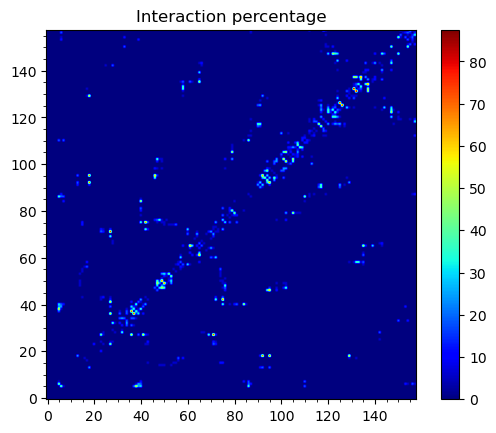

In [22]:
showWaterBridgeMatrix(analysisAtomic, 'percentage')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


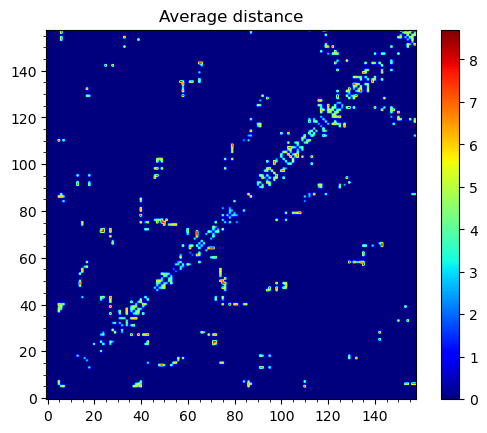

In [23]:
showWaterBridgeMatrix(analysisAtomic, 'distAvg')

@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices
@> WARNING matplotlib 3.6 and later are not compatible with interactive matrices


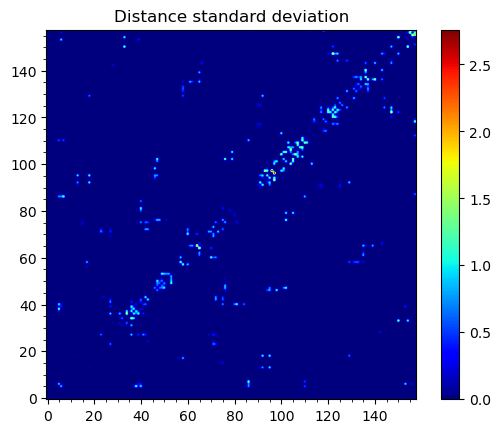

In [24]:
showWaterBridgeMatrix(analysisAtomic, 'distStd')

Raw data of the matrices can be obatined with 
:func:`.calcWaterBridgeMatrix`. The type of the matrix can be
selected among: *'percentage'*, *'distAvg'*, *'distStd'*.

In [25]:
M1 = calcWaterBridgeMatrix(analysisAtomic, 'percentage')
M2 = calcWaterBridgeMatrix(analysisAtomic, 'distAvg')
M3 = calcWaterBridgeMatrix(analysisAtomic, 'distStd')

In [26]:
M1

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 12.5 , 31.25],
       [ 0.  ,  0.  ,  0.  , ..., 12.5 ,  0.  , 12.5 ],
       [ 0.  ,  0.  ,  0.  , ..., 31.25, 12.5 ,  0.  ]])

In [27]:
M2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 4.58851337,
        5.82083416],
       [0.        , 0.        , 0.        , ..., 4.58851337, 0.        ,
        3.52366138],
       [0.        , 0.        , 0.        , ..., 5.82083416, 3.52366138,
        0.        ]])

In [28]:
M3

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 1.71697354,
        1.38650537],
       [0.        , 0.        , 0.        , ..., 1.71697354, 0.        ,
        1.27207112],
       [0.        , 0.        , 0.        , ..., 1.38650537, 1.27207112,
        0.        ]])

### Statistical analysis for water bridges

To visualize the results in a more accessible way, we can use 
:func:`.calcWaterBridgeMatrix` function which will show how often
each residue were contributing to the water bridges in the trajectory.

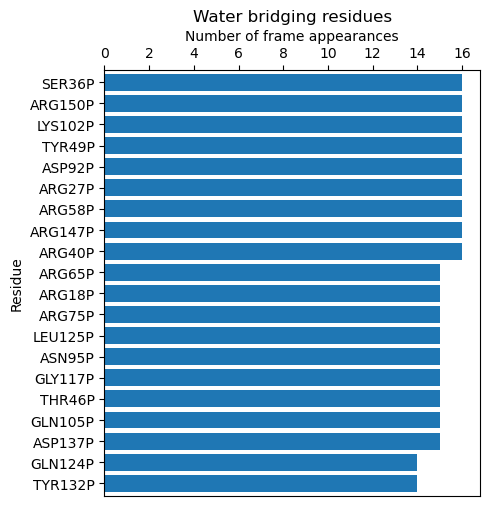

[('LEU96P', 1),
 ('MET63P', 1),
 ('PHE152P', 1),
 ('LEU29P', 1),
 ('PRO130P', 1),
 ('PHE85P', 1),
 ('PRO54P', 1),
 ('ILE16P', 1),
 ('CYS148P', 1),
 ('VAL25P', 1),
 ('ILE77P', 1),
 ('PRO20P', 2),
 ('ILE127P', 2),
 ('ILE68P', 2),
 ('GLY14P', 2),
 ('GLY67P', 2),
 ('ALA111P', 3),
 ('VAL73P', 3),
 ('ALA24P', 3),
 ('LEU115P', 3),
 ('PRO55P', 4),
 ('ALA74P', 4),
 ('PRO121P', 4),
 ('ASN15P', 4),
 ('LEU13P', 4),
 ('ILE51P', 5),
 ('THR31P', 5),
 ('TYR119P', 5),
 ('VAL106P', 5),
 ('SER103P', 5),
 ('SER43P', 5),
 ('CYS17P', 5),
 ('CYS62P', 5),
 ('THR78P', 5),
 ('ALA151P', 5),
 ('ASP56P', 5),
 ('GLU139P', 5),
 ('TYR142P', 6),
 ('GLU114P', 6),
 ('TYR87P', 6),
 ('PRO69P', 6),
 ('LEU153P', 6),
 ('ASP81P', 7),
 ('CYS90P', 7),
 ('SER7P', 7),
 ('SER118P', 7),
 ('TYR57P', 7),
 ('LYS112P', 7),
 ('HSE66P', 7),
 ('GLN33P', 7),
 ('THR140P', 8),
 ('GLN144P', 8),
 ('ASP98P', 8),
 ('LEU116P', 8),
 ('LYS64P', 8),
 ('GLY133P', 8),
 ('MET70P', 8),
 ('GLY52P', 8),
 ('ASP32P', 9),
 ('ILE113P', 9),
 ('LYS110P', 9),
 (

In [29]:
calcBridgingResiduesHistogram(waterBridges)

*clip* option can be used to include different number of results
on the histogram.

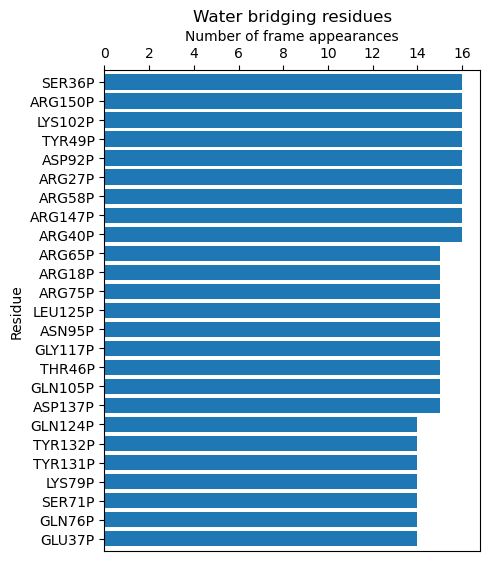

[('LEU96P', 1),
 ('MET63P', 1),
 ('PHE152P', 1),
 ('LEU29P', 1),
 ('PRO130P', 1),
 ('PHE85P', 1),
 ('PRO54P', 1),
 ('ILE16P', 1),
 ('CYS148P', 1),
 ('VAL25P', 1),
 ('ILE77P', 1),
 ('PRO20P', 2),
 ('ILE127P', 2),
 ('ILE68P', 2),
 ('GLY14P', 2),
 ('GLY67P', 2),
 ('ALA111P', 3),
 ('VAL73P', 3),
 ('ALA24P', 3),
 ('LEU115P', 3),
 ('PRO55P', 4),
 ('ALA74P', 4),
 ('PRO121P', 4),
 ('ASN15P', 4),
 ('LEU13P', 4),
 ('ILE51P', 5),
 ('THR31P', 5),
 ('TYR119P', 5),
 ('VAL106P', 5),
 ('SER103P', 5),
 ('SER43P', 5),
 ('CYS17P', 5),
 ('CYS62P', 5),
 ('THR78P', 5),
 ('ALA151P', 5),
 ('ASP56P', 5),
 ('GLU139P', 5),
 ('TYR142P', 6),
 ('GLU114P', 6),
 ('TYR87P', 6),
 ('PRO69P', 6),
 ('LEU153P', 6),
 ('ASP81P', 7),
 ('CYS90P', 7),
 ('SER7P', 7),
 ('SER118P', 7),
 ('TYR57P', 7),
 ('LYS112P', 7),
 ('HSE66P', 7),
 ('GLN33P', 7),
 ('THR140P', 8),
 ('GLN144P', 8),
 ('ASP98P', 8),
 ('LEU116P', 8),
 ('LYS64P', 8),
 ('GLY133P', 8),
 ('MET70P', 8),
 ('GLY52P', 8),
 ('ASP32P', 9),
 ('ILE113P', 9),
 ('LYS110P', 9),
 (

In [30]:
calcBridgingResiduesHistogram(waterBridges, clip=25)

If we are interested in one particular residue, we can also use
:func:`.calcWaterBridgesDistribution` to find their partners in 
water bridges. Below we can see results for arginine 147 or 
aspartic acid 92 from chain P.

In [31]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P')

[('GLN122P', 8),
 ('ARG150P', 7),
 ('GLN143P', 6),
 ('LYS123P', 6),
 ('GLN124P', 5),
 ('ASP120P', 5),
 ('GLN144P', 3),
 ('THR140P', 2)]

In [32]:
calcWaterBridgesDistribution(waterBridges, 'ASP92P') 

[('ARG18P', 11),
 ('ASN95P', 10),
 ('SER94P', 5),
 ('MET91P', 5),
 ('ASP129P', 4),
 ('LEU13P', 3),
 ('CYS90P', 1)]

Once we select a pair of residues which are supported by interactions
with water molecules we can use :func:`.calcWaterBridgesDistribution`
to obtain histograms with results such as distances between them 
*(metric='distance')*, the number of water molecules which were involved
*(metric='waters')*, and information about residue part which was involved
in water bridges, i.e. backbone or side chain *(metric='location')*. 

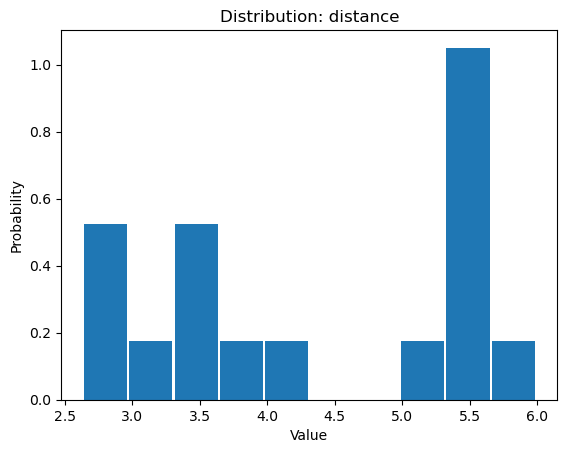

[5.3736005,
 5.3736005,
 5.167575,
 2.681302,
 5.371548,
 2.6318514,
 3.0394073,
 4.0884595,
 5.4406505,
 3.4112484,
 2.805657,
 5.4176636,
 3.5104342,
 5.991175,
 5.470093,
 3.4345005,
 3.6427624]

In [33]:
calcWaterBridgesDistribution(waterBridges,  'ASP92P', 'ARG18P', trajectory=trajectory, metric='distance')

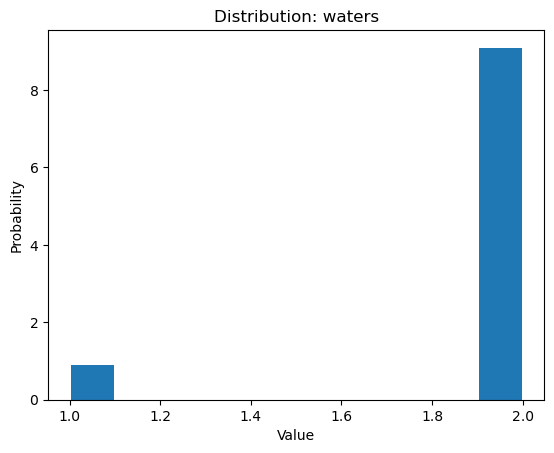

[2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2]

In [34]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', metric='waters') 

In [35]:
calcWaterBridgesDistribution(waterBridges, 'ARG147P', 'GLN122P', trajectory=trajectory, metric='location')

{'ARG147P': {'backbone': 7, 'side': 86},
 'GLN122P': {'backbone': 21, 'side': 25}}

### Save results as PDB file

The results can be storage as PDB file using :func:`.savePDBWaterBridges` 
(single PDB file, single frame) or using :func:`.savePDBWaterBridgesTrajectory`
to save all the results (large number of frames saved each independently).

5kqm_all_sci_multi_0.pdb  5kqm_all_sci_multi_4.pdb  5kqm_all_sci_multi_8.pdb   5kqm_all_sci_multi_12.pdb
5kqm_all_sci_multi_1.pdb  5kqm_all_sci_multi_5.pdb  5kqm_all_sci_multi_9.pdb   5kqm_all_sci_multi_13.pdb
5kqm_all_sci_multi_2.pdb  5kqm_all_sci_multi_6.pdb  5kqm_all_sci_multi_10.pdb  5kqm_all_sci_multi_14.pdb
5kqm_all_sci_multi_3.pdb  5kqm_all_sci_multi_7.pdb  5kqm_all_sci_multi_11.pdb  5kqm_all_sci_multi_15.pdb

Those results can be displayed in any program for visualization. The results 
for protein structure will be storage in beta column (average values of 
contributions of each residue in water bridging) and occupancy column 
(results for particular frame). Water molecules will be included in each frame.

In [36]:
savePDBWaterBridges(waterBridges[0], coords_traj, PDBtraj_file[:-4]+'_frame0.pdb')

savePDBWaterBridgesTrajectory(waterBridges, coords_traj, filename=PDBtraj_file[:-4]+'_multi.pdb', trajectory=trajectory)

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## *Water bridges detection in ensemble pdb*

This time we will use multi-model PDB which contain 50 frames
from MD simulations form PE-binding protein 1 (PDB code: *1beh*).
Simulation were performed using NAMD and saved as multi-model PDB
using VMD. Remember to align the protein structure before analyzing
it. Otherwise when all structures will be uploaded to the visualization
program they will be spread out in space.

In [37]:
ens = 'pebp1_50frames.pdb'
coords_ens = parsePDB(ens)
bridgeFrames_ens = calcWaterBridgesTrajectory(coords_ens, coords_ens)

@> 20195 atoms and 51 coordinate set(s) were parsed in 1.88s.
@> Frame: 0
@> 161 water bridges detected.
@> Frame: 1
@> 127 water bridges detected.
@> Frame: 2
@> 168 water bridges detected.
@> Frame: 3
@> 132 water bridges detected.
@> Frame: 4
@> 142 water bridges detected.
@> Frame: 5
@> 166 water bridges detected.
@> Frame: 6
@> 150 water bridges detected.
@> Frame: 7
@> 159 water bridges detected.
@> Frame: 8
@> 147 water bridges detected.
@> Frame: 9
@> 136 water bridges detected.
@> Frame: 10
@> 127 water bridges detected.
@> Frame: 11
@> 135 water bridges detected.
@> Frame: 12
@> 162 water bridges detected.
@> Frame: 13
@> 135 water bridges detected.
@> Frame: 14
@> 178 water bridges detected.
@> Frame: 15
@> 128 water bridges detected.
@> Frame: 16
@> 145 water bridges detected.
@> Frame: 17
@> 157 water bridges detected.
@> Frame: 18
@> 111 water bridges detected.
@> Frame: 19
@> 122 water bridges detected.
@> Frame: 20
@> 171 water bridges detected.
@> Frame: 21
@> 144 wate

Analysis of the results is similar to the one presented in 
trajectory analysis. Below examples showing which residues
are the most frequently involved in water bridges formation 
(:func:`.calcBridgingResiduesHistogram`), details of that 
interactions (:func:`.calcWaterBridgesStatistics`), and
results saved as PDB structure for further visualization 
(:func:`.savePDBWaterBridgesTrajectory`). Other functions 
can be seen in the analysis of trajectory.

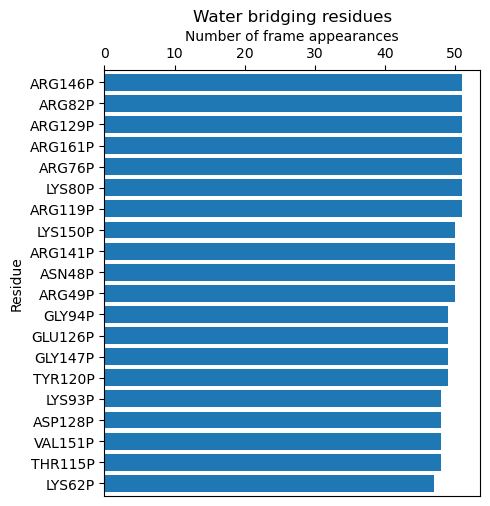

[('VAL34P', 1),
 ('VAL177P', 1),
 ('PRO43P', 1),
 ('LEU41P', 2),
 ('MET92P', 2),
 ('VAL164P', 3),
 ('LEU14P', 3),
 ('TYR169P', 3),
 ('PHE154P', 4),
 ('THR167P', 4),
 ('PRO178P', 4),
 ('LEU25P', 5),
 ('SER104P', 6),
 ('PRO136P', 6),
 ('ILE53P', 7),
 ('GLN170P', 7),
 ('TYR29P', 8),
 ('TYR106P', 8),
 ('PRO50P', 8),
 ('GLY38P', 8),
 ('PRO71P', 9),
 ('LEU138P', 9),
 ('PRO24P', 10),
 ('ASP18P', 10),
 ('LEU103P', 10),
 ('GLN127P', 10),
 ('TYR181P', 11),
 ('ILE137P', 11),
 ('VAL107P', 12),
 ('LEU131P', 12),
 ('TYR158P', 13),
 ('PRO112P', 13),
 ('PRO11P', 13),
 ('PRO74P', 15),
 ('PRO163P', 16),
 ('LEU160P', 16),
 ('HSE85P', 16),
 ('LEU58P', 17),
 ('LEU184P', 17),
 ('PRO130P', 17),
 ('PRO21P', 18),
 ('VAL17P', 19),
 ('LEU63P', 19),
 ('ASP35P', 19),
 ('GLU36P', 20),
 ('TYR81P', 20),
 ('PRO79P', 20),
 ('VAL40P', 20),
 ('HSE86P', 21),
 ('TRP84P', 21),
 ('ASP175P', 23),
 ('GLU159P', 23),
 ('GLY116P', 23),
 ('LEU5P', 23),
 ('ASP174P', 25),
 ('GLU172P', 25),
 ('GLU182P', 26),
 ('THR51P', 26),
 ('GLU19

In [38]:
calcBridgingResiduesHistogram(bridgeFrames_ens)

In [39]:
analysisAtomic_ens = calcWaterBridgesStatistics(bridgeFrames_ens, coords_ens)

for item in analysisAtomic_ens.items():
  print(item)

@> RES1           RES2           PERC      DIST_AVG  DIST_STD  
@> VAL3P          HSE26P         19.608    5.581     0.696     
@> HSE26P         VAL3P          19.608    5.581     0.696     
@> ASP4P          SER6P          13.725    3.817     0.560     
@> SER6P          ASP4P          13.725    3.817     0.560     
@> SER6P          LYS7P          43.137    4.394     1.114     
@> LYS7P          SER6P          43.137    4.394     1.114     
@> LYS7P          GLU36P         1.961     6.088     0.000     
@> GLU36P         LYS7P          1.961     6.088     0.000     
@> LYS7P          LEU37P         7.843     6.353     0.433     
@> LEU37P         LYS7P          7.843     6.353     0.433     
@> GLY10P         SER13P         43.137    4.759     0.612     
@> SER13P         GLY10P         43.137    4.759     0.612     
@> GLY10P         ARG76P         11.765    5.309     0.586     
@> ARG76P         GLY10P         11.765    5.309     0.586     
@> LEU12P         SER13P         45.098 

@> GLU83P         LYS150P        45.098    4.177     1.106     
@> LYS150P        GLU83P         45.098    4.177     1.106     
@> HSE86P         SER109P        21.569    5.444     0.369     
@> SER109P        HSE86P         21.569    5.444     0.369     
@> ASN91P         LEU131P        5.882     3.301     0.664     
@> LEU131P        ASN91P         5.882     3.301     0.664     
@> ASN91P         THR101P        62.745    4.407     0.524     
@> THR101P        ASN91P         62.745    4.407     0.524     
@> ASN91P         CYS133P        15.686    5.972     0.550     
@> CYS133P        ASN91P         15.686    5.972     0.550     
@> LYS93P         GLY94P         82.353    2.885     0.116     
@> GLY94P         LYS93P         82.353    2.885     0.116     
@> ASN95P         ASP96P         68.627    3.580     0.969     
@> ASP96P         ASN95P         68.627    3.580     0.969     
@> ASP96P         SER98P         47.059    4.065     0.852     
@> SER98P         ASP96P         47.059 

@> LEU12P         LYS7P          27.451    5.669     0.629     
@> LYS7P          LEU14P         5.882     5.741     0.168     
@> LEU14P         LYS7P          5.882     5.741     0.168     
@> TRP8P          GLN20P         35.294    4.703     0.520     
@> GLN20P         TRP8P          35.294    4.703     0.520     
@> LEU12P         LEU14P         3.922     5.162     0.022     
@> LEU14P         LEU12P         3.922     5.162     0.022     
@> SER13P         GLN15P         31.373    3.430     0.596     
@> GLN15P         SER13P         31.373    3.430     0.596     
@> GLU16P         ARG76P         21.569    6.410     1.366     
@> ARG76P         GLU16P         21.569    6.410     1.366     
@> GLN22P         PRO163P        23.529    4.762     0.440     
@> PRO163P        GLN22P         23.529    4.762     0.440     
@> GLN22P         ARG161P        35.294    7.063     0.843     
@> ARG161P        GLN22P         35.294    7.063     0.843     
@> HSE23P         ASP59P         19.608 

@> GLN22P         LYS62P         15.686    7.475     0.746     
@> LYS62P         GLN22P         15.686    7.475     0.746     
@> GLN22P         GLY57P         7.843     7.573     0.343     
@> GLY57P         GLN22P         7.843     7.573     0.343     
@> GLN22P         ASP59P         5.882     8.099     0.453     
@> ASP59P         GLN22P         5.882     8.099     0.453     
@> HSE23P         GLY57P         17.647    4.000     0.789     
@> GLY57P         HSE23P         17.647    4.000     0.789     
@> ALA30P         LYS47P         17.647    7.963     0.203     
@> LYS47P         ALA30P         17.647    7.963     0.203     
@> ALA30P         ASN48P         45.098    7.129     0.564     
@> ASN48P         ALA30P         45.098    7.129     0.564     
@> ARG49P         PRO50P         11.765    5.953     0.756     
@> PRO50P         ARG49P         11.765    5.953     0.756     
@> PRO50P         SER98P         5.882     6.609     0.420     
@> SER98P         PRO50P         5.882  

@> ARG82P         ASP78P         31.373    5.410     0.419     
@> GLU83P         VAL151P        1.961     5.483     0.000     
@> VAL151P        GLU83P         1.961     5.483     0.000     
@> ASN91P         LYS93P         7.843     5.546     0.975     
@> LYS93P         ASN91P         7.843     5.546     0.975     
@> ASP128P        GLU159P        15.686    6.521     0.620     
@> GLU159P        ASP128P        15.686    6.521     0.620     
@> ASP134P        LYS157P        27.451    3.456     1.408     
@> LYS157P        ASP134P        27.451    3.456     1.408     
@> GLU135P        LYS157P        39.216    3.182     0.740     
@> LYS157P        GLU135P        39.216    3.182     0.740     
@> GLY143P        HSE145P        3.922     4.763     0.828     
@> HSE145P        GLY143P        3.922     4.763     0.828     
@> LYS150P        SER153P        31.373    5.890     0.846     
@> SER153P        LYS150P        31.373    5.890     0.846     
@> ARG161P        PRO163P        5.882  

@> GLY108P        GLY110P        17.647    3.696     0.614     
@> GLY110P        GLY108P        17.647    3.696     0.614     
@> GLY108P        TYR120P        13.725    5.709     0.475     
@> TYR120P        GLY108P        13.725    5.709     0.475     
@> GLY108P        SER109P        11.765    4.231     0.820     
@> SER109P        GLY108P        11.765    4.231     0.820     
@> PRO112P        GLY116P        3.922     5.642     0.015     
@> GLY116P        PRO112P        3.922     5.642     0.015     
@> LEU117P        HSE118P        7.843     4.200     0.966     
@> HSE118P        LEU117P        7.843     4.200     0.966     
@> LEU117P        ARG119P        19.608    5.647     0.238     
@> ARG119P        LEU117P        19.608    5.647     0.238     
@> GLU126P        PRO163P        3.922     7.439     0.629     
@> PRO163P        GLU126P        3.922     7.439     0.629     
@> GLN127P        ASP128P        3.922     4.194     0.140     
@> ASP128P        GLN127P        3.922  

@> ARG76P         SER75P         21.569    3.534     0.227     
@> SER75P         LYS77P         19.608    3.775     0.290     
@> LYS77P         SER75P         19.608    3.775     0.290     
@> ARG76P         GLN170P        3.922     7.044     0.685     
@> GLN170P        ARG76P         3.922     7.044     0.685     
@> HSE86P         TYR106P        1.961     5.495     0.000     
@> TYR106P        HSE86P         1.961     5.495     0.000     
@> HSE86P         VAL107P        9.804     4.659     0.953     
@> VAL107P        HSE86P         9.804     4.659     0.953     
@> TYR106P        SER109P        1.961     4.453     0.000     
@> SER109P        TYR106P        1.961     4.453     0.000     
@> GLY116P        LEU117P        19.608    4.024     0.838     
@> LEU117P        GLY116P        19.608    4.024     0.838     
@> LYS132P        CYS133P        15.686    5.371     1.281     
@> CYS133P        LYS132P        15.686    5.371     1.281     
@> CYS133P        ASP134P        5.882  

@> ASP59P         ASN95P         3.922     7.622     0.231     
@> ASN95P         ASP59P         3.922     7.622     0.231     
@> ASP72P         PRO74P         1.961     5.157     0.000     
@> PRO74P         ASP72P         1.961     5.157     0.000     
@> ARG141P        GLN183P        31.373    3.845     0.745     
@> GLN183P        ARG141P        31.373    3.845     0.745     
@> GLY147P        LYS148P        7.843     5.092     1.556     
@> LYS148P        GLY147P        7.843     5.092     1.556     
@> SER6P          GLU36P         5.882     7.426     0.538     
@> GLU36P         SER6P          5.882     7.426     0.538     
@> GLY31P         ASN48P         5.882     8.070     0.305     
@> ASN48P         GLY31P         5.882     8.070     0.305     
@> ALA32P         ASN48P         3.922     8.941     0.149     
@> ASN48P         ALA32P         3.922     8.941     0.149     
@> GLU36P         LEU37P         5.882     5.309     0.318     
@> LEU37P         GLU36P         5.882  

@> TYR81P         ASP78P         5.882     5.484     0.368     
@> THR115P        GLU172P        3.922     7.386     0.608     
@> GLU172P        THR115P        3.922     7.386     0.608     
@> LYS179P        GLU182P        29.412    5.239     0.808     
@> GLU182P        LYS179P        29.412    5.239     0.808     
@> THR44P         GLN45P         7.843     5.175     1.802     
@> GLN45P         THR44P         7.843     5.175     1.802     
@> ASP70P         PRO74P         1.961     7.232     0.000     
@> PRO74P         ASP70P         1.961     7.232     0.000     
@> ALA73P         PRO74P         1.961     4.305     0.000     
@> PRO74P         ALA73P         1.961     4.305     0.000     
@> LEU138P        SER139P        3.922     3.644     1.370     
@> SER139P        LEU138P        3.922     3.644     1.370     
@> TRP173P        TYR181P        3.922     6.158     0.451     
@> TYR181P        TRP173P        3.922     6.158     0.451     
@> GLY61P         LYS62P         3.922  

@> SER99P         THR101P        3.922     7.868     0.838     
@> THR101P        SER99P         3.922     7.868     0.838     
@> GLY108P        GLN183P        11.765    7.180     0.862     
@> GLN183P        GLY108P        11.765    7.180     0.862     
@> ASN140P        GLN183P        1.961     7.488     0.000     
@> GLN183P        ASN140P        1.961     7.488     0.000     
@> ALA152P        LYS156P        3.922     7.017     0.140     
@> LYS156P        ALA152P        3.922     7.017     0.140     
@> ASP4P          ASP56P         3.922     8.160     0.216     
@> ASP56P         ASP4P          3.922     8.160     0.216     
@> THR44P         ASP175P        5.882     7.082     0.764     
@> ASP175P        THR44P         5.882     7.082     0.764     
@> LYS47P         SER109P        1.961     5.350     0.000     
@> SER109P        LYS47P         1.961     5.350     0.000     
@> VAL17P         PHE149P        1.961     6.047     0.000     
@> PHE149P        VAL17P         1.961  

@> ASP96P         MET92P         1.961     4.360     0.000     
@> LEU25P         LEU37P         1.961     6.549     0.000     
@> LEU37P         LEU25P         1.961     6.549     0.000     
@> LEU37P         THR167P        1.961     4.236     0.000     
@> THR167P        LEU37P         1.961     4.236     0.000     
@> SER75P         HSE118P        1.961     7.580     0.000     
@> HSE118P        SER75P         1.961     7.580     0.000     
@> GLN15P         ARG155P        1.961     8.382     0.000     
@> ARG155P        GLN15P         1.961     8.382     0.000     
@> ASP18P         ALA162P        1.961     7.524     0.000     
@> ALA162P        ASP18P         1.961     7.524     0.000     
@> THR28P         THR51P         1.961     4.348     0.000     
@> THR51P         THR28P         1.961     4.348     0.000     
@> LEU58P         TYR64P         1.961     6.039     0.000     
@> TYR64P         LEU58P         1.961     6.039     0.000     
@> ASN91P         LYS132P        1.961  

((3, 26), {'percentage': 19.607843137254903, 'distAvg': 5.581385743680688, 'distStd': 0.6957564326481819})
((26, 3), {'percentage': 19.607843137254903, 'distAvg': 5.581385743680688, 'distStd': 0.6957564326481819})
((4, 6), {'percentage': 13.72549019607843, 'distAvg': 3.8172178618552115, 'distStd': 0.5598418865989507})
((6, 4), {'percentage': 13.72549019607843, 'distAvg': 3.8172178618552115, 'distStd': 0.5598418865989507})
((6, 7), {'percentage': 43.13725490196079, 'distAvg': 4.393957173091035, 'distStd': 1.1138722373063479})
((7, 6), {'percentage': 43.13725490196079, 'distAvg': 4.393957173091035, 'distStd': 1.1138722373063479})
((7, 36), {'percentage': 1.9607843137254901, 'distAvg': 6.088490946039092, 'distStd': 0.0})
((36, 7), {'percentage': 1.9607843137254901, 'distAvg': 6.088490946039092, 'distStd': 0.0})
((7, 37), {'percentage': 7.8431372549019605, 'distAvg': 6.352599626812257, 'distStd': 0.43259332105891846})
((37, 7), {'percentage': 7.8431372549019605, 'distAvg': 6.35259962681225

In [40]:
savePDBWaterBridgesTrajectory(bridgeFrames_ens, coords_ens, ens[:-4]+'_ens.pdb')

@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...6074 4190 14360'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...9718 17936 7184'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...947 10043 11756'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...0099 12848 4175'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...6031 8645 18008'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...9784 4394 16031'.
@> All 51 coordinate sets are copied to pebp1_50frames Selection 'protein' + pebp1_50frames Selection 'same residue as...799 18317 20057'.
@> All 51 coordinate sets a

### Detecting water centers

Previous function generated multiple PDB in which we would
found protein and water molecules for each frame that form
water bridges with protein structure. Now we can use another
function :func:`.findClusterCenters` which will extract 
water centers (they refer to the oxygens from water molecules
that are forming clusters). We need to provide a file pattern
as show below. Now all the files with prefix *'pebp1_50frames_ens_'*
will be analyzed.

In [41]:
findClusterCenters('pebp1_50frames_ens_*.pdb')

@> 3269 atoms and 1 coordinate set(s) were parsed in 0.11s.
@> 3161 atoms and 1 coordinate set(s) were parsed in 0.05s.
@> 3173 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3173 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3218 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3251 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3215 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3230 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3230 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3224 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3158 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3176 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3218 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3284 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3227 atoms and 1 coordinate set(s) were parsed in 0.03s.
@> 3251 atoms and 1 coordinate set(s) were parsed in 0.04s.
@> 3233 atoms and 1 coordinate set(s) we

Function generated one PDB file with water centers.
We used default values, such as distC (distance to other molecule)
and numC (min number of molecules in a cluster), but 
those values could be changed if the molecules are more widely 
distributed or we would like to have more numerous clusters.
Moreover, this function can be applied on different type of molecules
by using *selection* paramater. We can provide the whole molecule 
and by default the center of mass will be used as a reference.

--------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------

## Changes in the default parameters

There are a lot of paramaters that can be changed in the water bridges
analysis including the distances, angles and the number of involved
water molecules or residues.

:arg **atoms**: Atomic object from which atoms are considered

:arg **method**: cluster or chain, where chain find shortest water bridging path between two protein atoms
    default is 'chain'

:arg **distDA**: maximal distance between water/protein donor and acceptor
    default is 3.5

:arg **distWR**: maximal distance between considered water and any residue
    default is 4

:arg **anglePDWA**: angle range where protein is donor and water is acceptor
    default is (100, 200)

:arg **anglePAWD**: angle range where protein is acceptor and water is donor
    default is (100, 140)

:arg **angleWW**: angle between water donor/acceptor
    default is (140, 180)

:arg **maxDepth**: maximum number of waters in chain/depth of residues in cluster
    default is 2

:arg **maxNumRes**: maximum number of water+protein residues in cluster
    default is None

:arg **donors**: which atoms to count as donors 
    default is ['N', 'O', 'S', 'F']

:arg **acceptors**: which atoms to count as acceptors 
    default is ['N', 'O', 'S', 'F']

:arg **output**: return information arrays, (protein atoms, water atoms), or just atom indices per bridge
    default is 'atomic'
:type output: 'info' | 'atomic' | 'indices'

:arg **isInfoLog**: should log information
    default is True

In [42]:
waterBridges_2 = calcWaterBridges(coords, method='cluster', distWR=3.0, distDA=3.2, maxDepth=3)

@> 17 water bridges detected.
@> SER7 OG_21 A LYS110 NZ_838 A 4.70722699686344 1 ['A_1316']
@> GLY14 O_72 A SER47 O_328 A GLU50 N_347 A 5.288116583434976 4.544135231262378 5.10489901956934 1 ['A_1274']
@> PRO20 O_115 A GLU23 OE1_139 A 4.571172934816621 1 ['A_1292']
@> GLU23 OE2_140 A SER71 O_514 A HIS72 ND1_523 A 4.934310286149422 4.127239392136104 4.463734423103597 1 ['A_1244']
@> ASP42 OD2_301 A ARG40 NH2_286 A 5.163938516287738 1 ['A_1246']
@> ASP81 OD1_598 A THR84 OG1_621 A ARG40 NH2_286 A 4.415462942886057 4.365525627000715 3.9229717052255175 1 ['A_1262']
@> GLY14 O_72 A SER47 O_328 A GLU50 N_347 A 5.288116583434976 4.544135231262378 5.10489901956934 1 ['A_1274']
@> GLU50 OE2_355 A TYR131 OH_1009 A 5.157987010452818 1 ['A_1299']
@> ARG65 NH2_473 A ASP135 O_1037 A 4.820906553751068 1 ['A_1267']
@> GLU23 OE2_140 A SER71 O_514 A HIS72 ND1_523 A 4.934310286149422 4.127239392136104 4.463734423103597 1 ['A_1244']
@> GLN105 NE2_800 A LYS102 O_772 A LYS79 NZ_582 A 4.2363221076778395 3.875